# **TSF GRIP Task #2**
# **Name : ADHAM MANSOUR**

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [92]:
D= pd.read_csv('iris.csv')

D.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [111]:
D.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [112]:
D.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [113]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [117]:
label_encoder = preprocessing.LabelEncoder()
D['Species']= label_encoder.fit_transform(D['Species']) 
print(D.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0


In [114]:
D.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

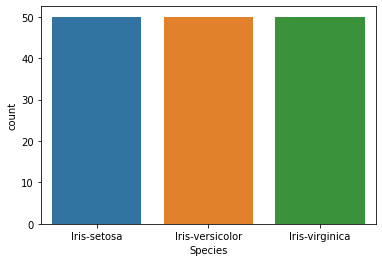

In [115]:
sns.countplot(x=D['Species'])
plt.show()

In [97]:
scaler=StandardScaler()
sample=D.iloc[:,1:5].values
D_scaler=scaler.fit_transform(sample)

In [98]:
pca= PCA(n_components=2)
feature = pca.fit_transform(D_scaler)
print(feature.shape)

(150, 2)


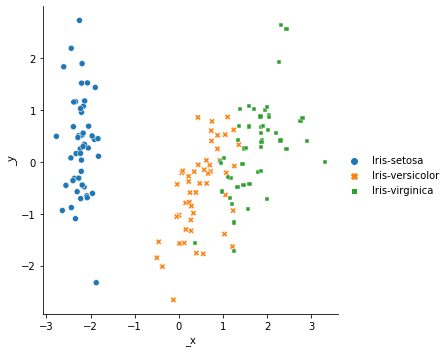

In [99]:
x=feature[:,0]
y=feature[:,1]
species=data['Species'].values
sns.relplot(x=x,y=y,data=feature,kind='scatter',hue=species,style=species)
plt.show()

C:\Users\user.DESKTOP-AFMPLMB.000\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


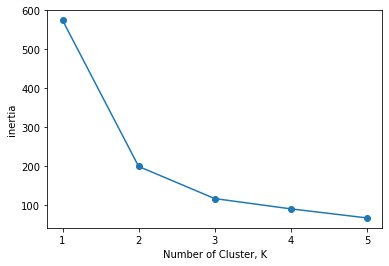

In [100]:
inertias=[]
for k in range(1,6):
    model=KMeans(n_clusters= k)
    model.fit(feature)
    inertias.append(model.inertia_)
    
plt.plot(range(1,6),inertias,'-o')
plt.xlabel('Number of Cluster, K')
plt.ylabel('inertia')
plt.xticks(range(1,6))
plt.show()

In [101]:
model=KMeans(n_clusters=3)
labels=model.fit_predict(feature)
df = pd.DataFrame({'labels':labels , 'Species':data['Species']})

pd.crosstab(df['labels'], df['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,0,39,14
1,50,0,0
2,0,11,36


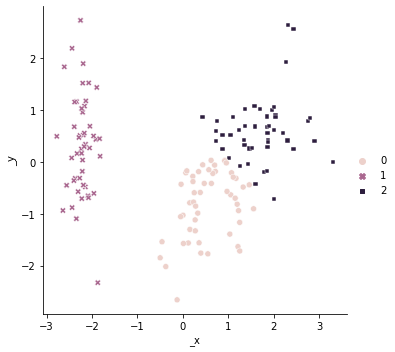

In [102]:
sns.relplot(x=x,y=y,data=feature,kind="scatter",hue=labels,style=labels)
plt.show()